<a href="https://colab.research.google.com/github/jcmachicao/codigos_susalud/blob/main/susalud__verificadores_modelo_v2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Preparación

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

In [2]:
ruta = 'drive/My Drive/2022 Proyectos/2023 Usaid TPI susalud/Modelos TPI San Martin/'
os.listdir(ruta)

['Indicadores Hospitalarios enero 2023.pdf',
 'Análisis situacional Hospital II 2 Tarapoto (1).pdf',
 'Indicadores Productividad Hora Médico enero 2023.pdf',
 'bd_supervisiones_san_martin.xlsx',
 'diagrama_v_Gestión de la Atención de la Unidad Renal.png',
 'diagrama_v_Gestión del Oxígeno Medicinal.png',
 'diagrama_v_INSTRUMENTO INTEGRAL COVID-19 -IPRESS V.04.png',
 'Untitled folder',
 'diagrama_v_Gestión de la Atención de la Unidad Renal.jpg',
 'diagrama_v_Gestión del Oxígeno Medicinal.jpg',
 'diagrama_v_INSTRUMENTO INTEGRAL COVID-19 -IPRESS V.04.jpg',
 'hosp-tarapoto2022-ENV.xlsx',
 'susalud__verificadores_modelo.ipynb']

## Lectura data

In [3]:
data_or = pd.read_excel(ruta + 'hosp-tarapoto2022-ENV.xlsx')

In [4]:
data_or.columns

Index(['ANNO', 'INSTRUMENTO', 'CODIGO', 'VERIFICADOR', 'VALOR', 'OBSERVACION',
       'PROCESO'],
      dtype='object')

In [ ]:
data_or.VERIFICADOR.unique()

In [6]:
data = data_or[data_or.VALOR!=3]

In [7]:
data['Valor_2'] = 2.01 - data.VALOR

<ipython-input-7-76b337df80b4>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Valor_2'] = 2.01 - data.VALOR


In [8]:
data.Valor_2.unique()

array([1.01, 0.01])

In [9]:
data.INSTRUMENTO.unique()  

array(['Gestión del Oxígeno Medicinal',
       'Gestión de la Atención de la Unidad Renal',
       'INSTRUMENTO INTEGRAL COVID-19 -IPRESS V.04'], dtype=object)

In [10]:
instrums = data.INSTRUMENTO.unique()

In [11]:
data_pv = pd.pivot_table(data, index=['INSTRUMENTO', 'PROCESO'], columns=['CODIGO'], values='Valor_2', aggfunc='mean')

In [12]:
data_pv.shape

(47, 99)

## Diagramas

In [13]:
tabs = []
for k, tab in data_pv.groupby('INSTRUMENTO'):
  print(k)
  tab1 = tab.loc[:, tab.sum() > 0]
  tabs.append([k, tab1])

Gestión de la Atención de la Unidad Renal
Gestión del Oxígeno Medicinal
INSTRUMENTO INTEGRAL COVID-19 -IPRESS V.04


Gestión de la Atención de la Unidad Renal
Gestión del Oxígeno Medicinal
INSTRUMENTO INTEGRAL COVID-19 -IPRESS V.04


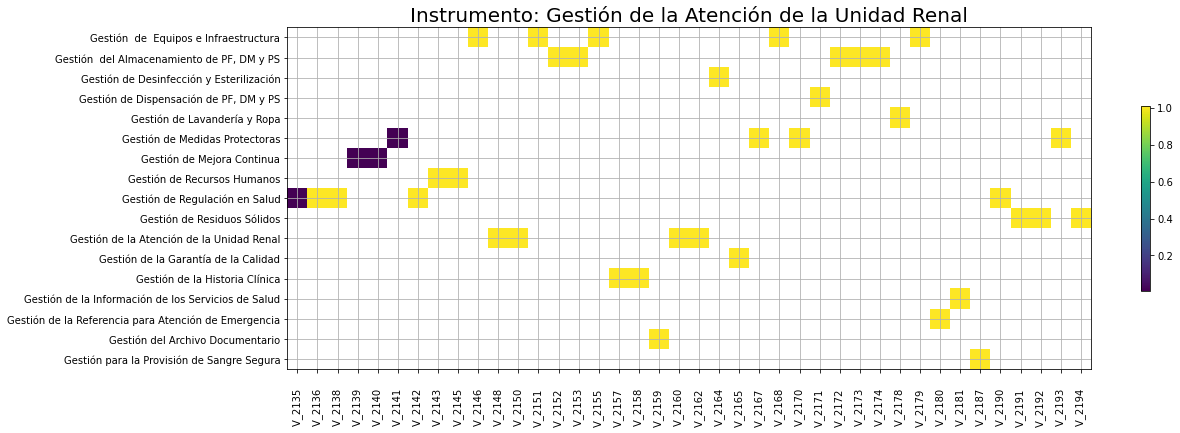

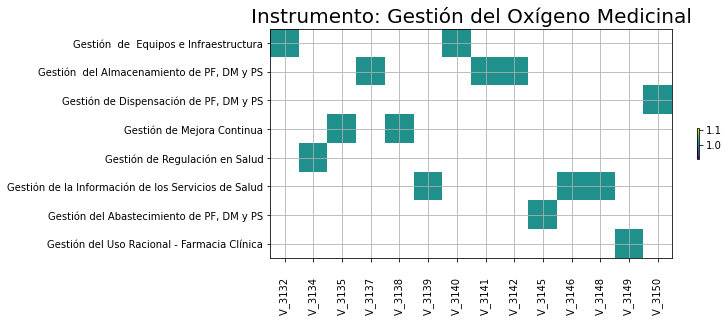

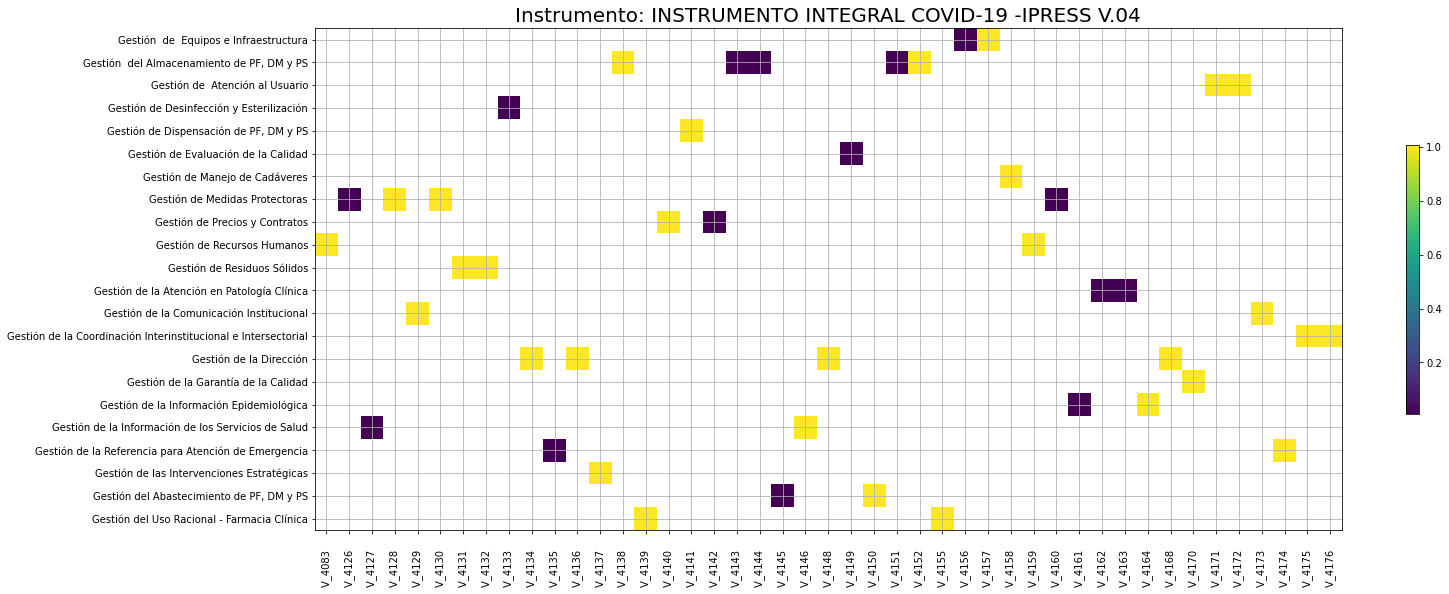

In [14]:
#@title Diagrama
tabs = []
for k, tab in data_pv.groupby('INSTRUMENTO'):
  print(k)
  tab1 = tab.loc[:, tab.sum() > 0]
  tabs.append([k, tab1])
  plt.figure(figsize=(tab1.shape[0]+1, tab1.shape[1]), facecolor='white')
  plt.imshow(tab1)
  plt.xticks(np.arange(len(tab1.columns)), tab1.columns, rotation=90)
  plt.yticks(np.arange(len(tab1)), tab1.index.get_level_values(1))
  rt = 0.1*len(tab1)/20
  plt.colorbar(shrink=rt)
  plt.title('Instrumento: ' + k, fontsize=20)
  plt.grid(True)
  plt.savefig(ruta+'diagrama_v_'+k+'.jpg', dpi=300)
  #plt.show()

In [15]:
len(tabs)

3

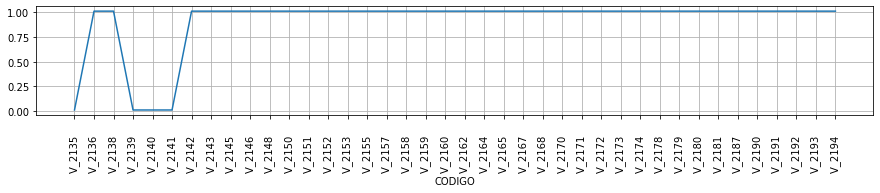

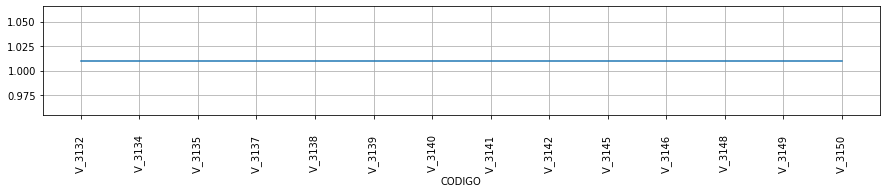

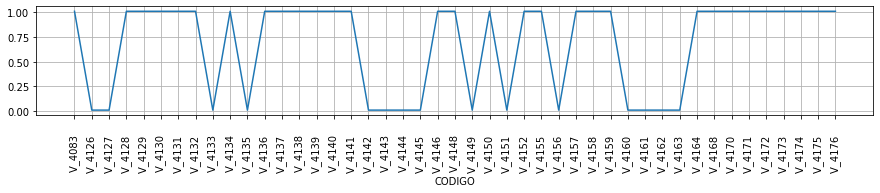

In [16]:
for tn in range(len(tabs)):
  plt.figure(figsize=(15,2))
  tabla = tabs[tn][1]
  tabla.mean(axis=0).plot()
  plt.xticks(np.arange(len(tabla.columns)), tabla.columns, rotation=90)
  plt.grid(True)
  plt.show()

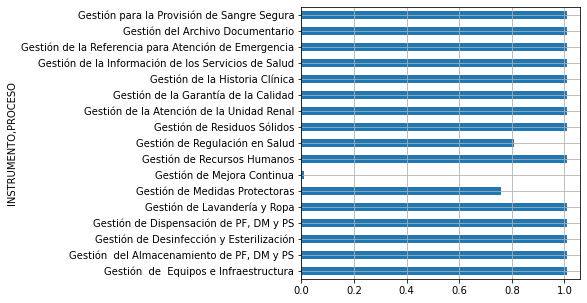

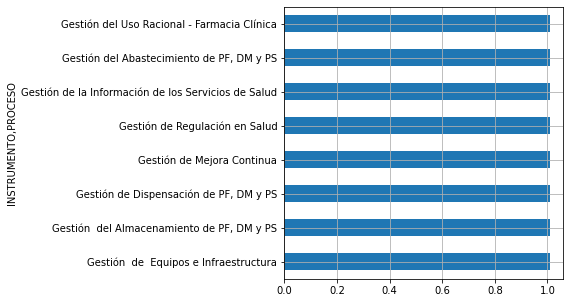

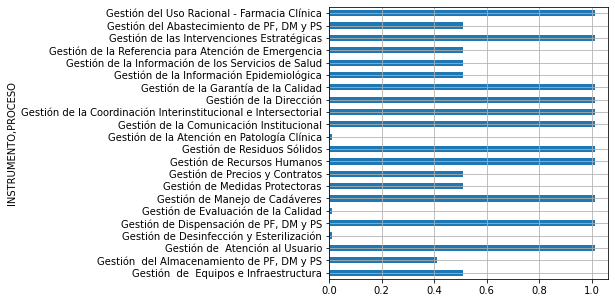

In [17]:
for tn in range(len(tabs)):
  plt.figure(figsize=(5,5))
  tabla = tabs[tn][1]
  tabla.mean(axis=1).plot(kind='barh')
  plt.yticks(np.arange(len(tabla)), tabla.index.get_level_values(1), rotation=0)
  plt.grid(True)
  plt.show()